In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [72]:
# Importing the dataset.
df = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df.columns = ['SrNo.','Date','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','Investment Type','Amount In USD','Remark']
# Checking the column names.
ColumnNames = list(df)
ColumnNames

['SrNo.',
 'Date',
 'Startup Name',
 'Industry Vertical',
 'SubVertical',
 'City Location',
 'Investors Name',
 'Investment Type',
 'Amount In USD',
 'Remark']

#### Question 1st:
Your Friend has developed the Product and
he wants to establish the product startup
and he is searching for a perfect location
where getting the investment has a high
chance. But due to its financial restriction, he
can choose only between three locations -
Bangalore, Mumbai, and NCR. As a friend,
you want to help your friend deciding the
location. NCR include Gurgaon, Noida and
New Delhi. Find the location where the most
number of funding is done. That means, find
the location where startups has received
funding maximum number of times. Plot the
bar graph between location and number of
funding. Take city name "Delhi" as "New
Delhi". Check the case-sensitiveness of cities
also. That means, at some place instead of
"Bangalore", "bangalore" is given. Take city
name as "Bangalore". For few startups
multiple locations are given, one Indian and
one Foreign. Consider the startup if any one
of the city lies in given locations.

In [73]:
# As we need the location column and we can only chose 3 Locations
# Changing 'Delhi' to 'New Delhi'
df['City Location'].replace('Delhi','New Delhi',inplace = True)
df['City Location'].replace('bangalore','Bangalore',inplace= True)

# Changing the Gurgaon, Noida and New Delhi to NCR
df['City Location'].replace('New Delhi','NCR',inplace = True)
df['City Location'].replace('Gurgaon','NCR',inplace = True)
df['City Location'].replace('Noida','NCR',inplace = True)

In [74]:
Locations = ['NCR','Bangalore','Mumbai']
dict = {}
for i in range(0,len(df['City Location'])):
    key = df['City Location'].iloc[i]
    if key in Locations:
        if key in dict:
            dict[key] += 1
        else:
            dict[key] = 1

print(dict)

{'NCR': 834, 'Mumbai': 567, 'Bangalore': 700}


In [75]:
# To check the numbers we can use value_counts
check = df['City Location'].value_counts()
check.head(10)

City Location
NCR          834
Bangalore    700
Mumbai       567
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Gurugram      50
Ahmedabad     38
Jaipur        30
Name: count, dtype: int64

In [78]:
dict
Place = dict.keys()
Total = dict.values()
for Place,Total in dict.items():
    print("At {0} number of funding received are : {1}".format(Place,Total))

At NCR number of funding received are : 834
At Mumbai number of funding received are : 567
At Bangalore number of funding received are : 700


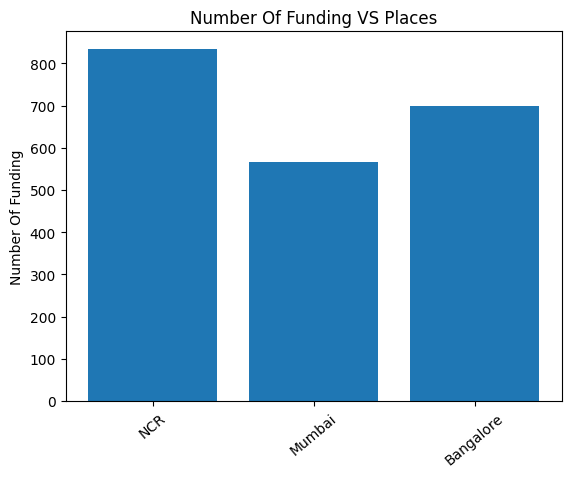

In [77]:
# Plotting the Bar Graph
plt.bar(Place,Total)
plt.ylabel('Number Of Funding')
plt.title('Number Of Funding VS Places')
plt.xticks(rotation=40)
plt.show()

##### Question 2nd:
Even after trying for so many times, your
friend's startup could not find the
investment. So you decided to take this
matter in your hand and try to find the list of
investors who probably can invest in your
friend's startup. Your list will increase the
chance of your friend startup getting some
initial investment by contacting these
investors. Find the top 5 investors who have
invested maximum number of times
(consider repeat investments in one
company also). In a startup, multiple
investors might have invested. So consider
each investor for that startup. Ignore
undisclosed investors.

In [216]:
import pandas as pd
import numpy as np

df = pd.read_csv('StartUp_Funding.csv',encoding = 'utf-8')
print(df.dtypes)

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


In [217]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [218]:
df['Investors Name'].dropna(inplace = True)
print(df.dtypes)

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


In [219]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [280]:
df.dropna(subset=['Investors Name'],inplace=True)
d = {}
for i in df['Investors Name']:
    # print(i)
    if i == '':
        continue
    j = i.split(',')
    for k in j:
        k = k.strip()
        if k != "":
            if k in d:
                d[k] += 1
            else:
                d[k] = 1

In [281]:
ans = sorted(d.items(), key=lambda x:x[1], reverse= True)
ans = ans[:5]
print(ans)

[('Sequoia Capital', 72), ('Accel Partners', 68), ('Kalaari Capital', 50), ('SAIF Partners', 47), ('Blume Ventures', 47)]


In [282]:
Names = []
Count = []
for i in range (0,len(ans)):
    Names.append(ans[i][0])
    Count.append(ans[i][1])
print(Names)
print(Count)

['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'SAIF Partners', 'Blume Ventures']
[72, 68, 50, 47, 47]


Sequoia Capital :  72
Accel Partners :  68
Kalaari Capital :  50
SAIF Partners :  47
Blume Ventures :  47


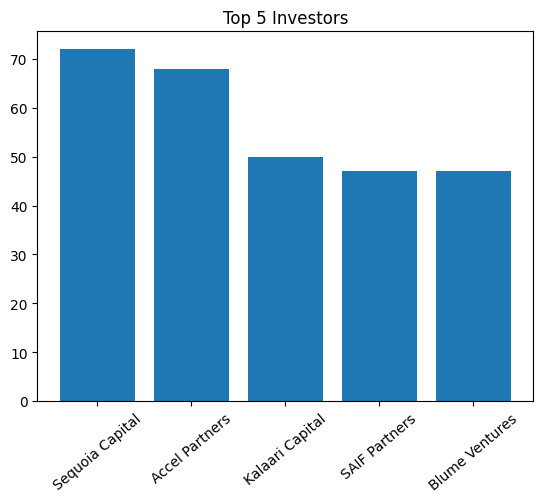

In [283]:
for i in range(0,len(Names)):
    print(Names[i],': ',Count[i])
plt.bar(Names,Count)
plt.title("Top 5 Investors")
plt.xticks(rotation = 40)
plt.show()

#### Question 3rd:
After re-analysing the dataset you found out
that some investors have invested in the
same startup at different number of funding
rounds. So before finalising the previous list,
you want to improvise it by finding the top 5
investors who have invested in different
number of startups. This list will be more
helpful than your previous list in finding the
investment for your friend startup. Find the
top 5 investors who have invested maximum
number of times in different companies. That
means, if one investor has invested multiple
times in one startup, count one for that
company. There are many errors in startup
names. Ignore correcting all, just handle the
important ones - Ola, Flipkart, Oyo and
Paytm.

In [228]:
df2 = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df.columns = ['SrNo.','Date','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','Investment Type','Amount In USD','Remark']
# Checking the column names.
ColumnNames = list(df)
df2.head(1)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


In [232]:
# Drop NULL values
df.dropna(subset=['Investors Name','Startup Name'],inplace=True)

# Replace Names with the correct names
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace=True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df['Startup Name'].replace('Olacabs','Ola',inplace=True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df['Startup Name'].replace('Olacabs','Ola',inplace=True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace=True)
df['Startup Name'].replace('Oyorooms','Oyo',inplace=True)
df['Startup Name'].replace('OyoRooms','Oyo',inplace=True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace=True)
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace=True)

In [233]:
df.dtypes

SrNo.                 int64
Date                 object
Startup Name         object
Industry Vertical    object
SubVertical          object
City Location        object
Investors Name       object
Investment Type      object
Amount In USD        object
Remark               object
dtype: object

In [234]:
df.isnull().sum()

SrNo.                   0
Date                    0
Startup Name            0
Industry Vertical     171
SubVertical           930
City Location         180
Investors Name          0
Investment Type         4
Amount In USD         956
Remark               2602
dtype: int64

In [258]:
StartUp = list(df['Startup Name'])
Investor = list(df['Investors Name'])
d = {}
print(len(StartUp) == len(Investor))
for i in range (0,len(StartUp)):
    Invest = Investor[i].split(',')
    for j in Invest:
        j = j.strip()
        if j != '':
            if j in d:
                s = d[j]
                s.add(StartUp[i])
                d[j] = s
            else:
                d[j] = {StartUp[i]}

print(d)

True
{'Tiger Global Management': {'BYJU’S', 'Saavn', 'Grey Orange', 'Grofers', 'Moglix', 'Roposo.com', 'LocalOye', 'OkCredit', 'Zenoti', 'BlackBuck', 'INDwealth', 'Delhivery', 'CleverTap', 'Chaayos', 'Cube26', 'Vedantu', 'Razorpay', 'Shopclues', 'Zo Rooms', 'Lybrate'}, 'Susquehanna Growth Equity': {'Shuttl'}, 'Sequoia Capital India': {'Mamaearth', 'Unacademy', 'Meesho', 'DailyHunt', 'Dhruva', 'Pocket Aces', 'Belong', 'Faasos', 'HealthKart', 'Moglix', 'Grofers', 'Blackbuck', 'CleverTap', 'Oyo', 'OncoStem', 'FreshDesk'}, 'Vinod Khatumal': {'https://www.wealthbucket.in/'}, 'Sprout Venture Partners': {'Fashor'}, 'Chiratae Ventures': {'HealthifyMe', 'Pando'}, 'Ant Financial': {'Zomato', 'Paytm'}, 'Sathguru Catalyzer Advisors': {'Ecozen'}, 'Ping An Global Voyager Fund': {'CarDekho'}, 'Mumbai Angels': {'Fitpass', 'BookEventz', 'Frsh', 'Joy by nature', 'Register My Marriage', 'FalconBrick', 'Leegality', 'Unocoin', 'MintM', 'AppsDaily', 'Betaout', 'Gingercrush', 'Massblurb', 'Azuro', 'Dhruva Sp

In [259]:
for key in d:
    d[key]=len(d[key])

ans1 = sorted(d.items(), key=lambda x:x[1], reverse= True)
ans1[:5]

[('Accel Partners', 59),
 ('Sequoia Capital', 53),
 ('Kalaari Capital', 47),
 ('Blume Ventures', 43),
 ('Indian Angel Network', 41)]

In [266]:
Investor_Name = []
Total_val = []

# As we need top 5 we take len form 0-5
for i in range(0,5):
    Investor_Name.append(ans1[i][0])
    Total_val.append(ans1[i][1])

print(Investor_Name)
print(Total_val)

['Accel Partners', 'Sequoia Capital', 'Kalaari Capital', 'Blume Ventures', 'Indian Angel Network']
[59, 53, 47, 43, 41]


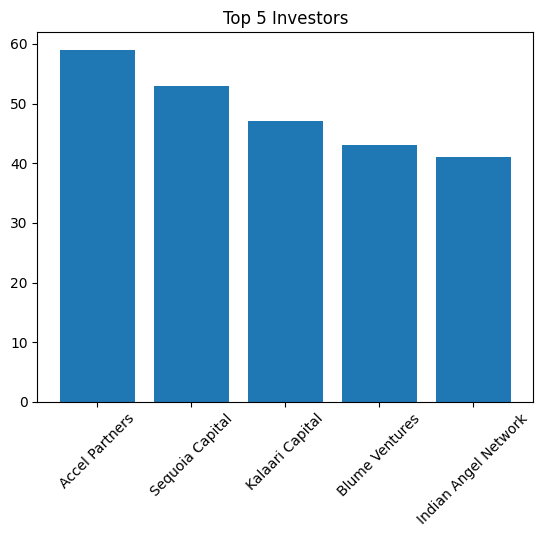

In [272]:
# PLotting the graph
plt.title('Top 5 Investors')
plt.bar(Investor_Name,Total_val)
plt.xticks(rotation = 45)
plt.show()